# Data Cleansing for NCAA Women's Basketball Dataset


## Step 1: Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Step 2: Load the prepared dataset


In [2]:
final_df = pd.read_csv('prepared_ncaa_wbb_data.csv')


# Step 3: Outlier Detection


## Visual detection of outliers using boxplot

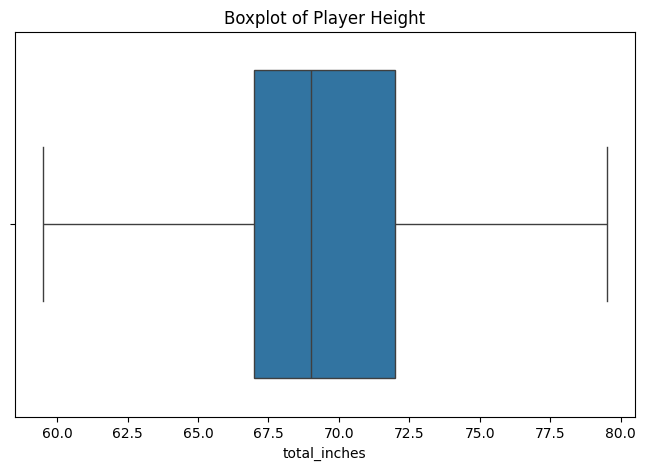

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='total_inches', data=final_df)
plt.title('Boxplot of Player Height')
plt.show()


## Statistical detection of outliers using IQR


In [15]:
Q1 = final_df['total_inches'].quantile(0.25)
Q3 = final_df['total_inches'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Step 4: Handling Outliers (Capping)


In [5]:
final_df['total_inches'] = np.where(final_df['total_inches'] < lower_bound, lower_bound,
                                    np.where(final_df['total_inches'] > upper_bound, upper_bound,
                                             final_df['total_inches']))


## Verify the result after handling outliers


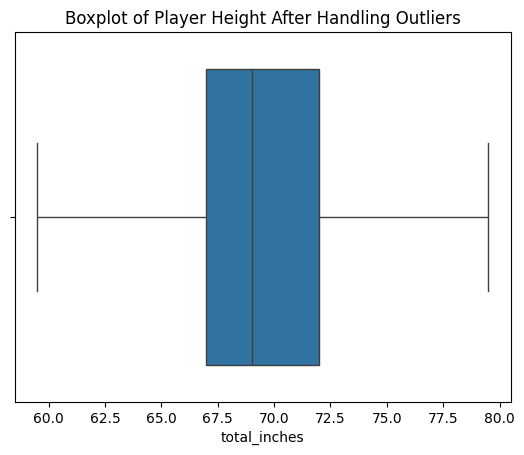

In [6]:
sns.boxplot(x='total_inches', data=final_df)
plt.title('Boxplot of Player Height After Handling Outliers')
plt.show()



# Step 5: Missing Values Analysis


In [7]:
print("\nMissing values before handling:")
print(final_df.isnull().sum())



Missing values before handling:
division            0
year_clean          0
total_inches        0
state_grouped       0
position_grouped    0
dtype: int64


## Assuming minimal missingness, handling by imputation (mean for height)


In [ ]:
final_df['total_inches'].fillna(final_df['total_inches'].mean(), inplace=True)


# For categorical columns, mode imputation (if needed)


In [ ]:
for column in ['division', 'year_clean', 'state_grouped', 'position_grouped']:
    final_df[column].fillna(final_df[column].mode()[0], inplace=True)


# Verify after imputation

In [10]:
print("\nMissing values after handling:")
print(final_df.isnull().sum())



Missing values after handling:
division            0
year_clean          0
total_inches        0
state_grouped       0
position_grouped    0
dtype: int64


# Save cleansed data


In [11]:
final_df.to_csv('cleansed_ncaa_wbb_data.csv', index=False)

print("\nData cleansing completed. Cleansed data saved successfully.")



Data cleansing completed. Cleansed data saved successfully.


# prepared dataset vs cleansed dataset

The lack of noticeable difference between **the** prepared dataset and the cleansed dataset likely indicates two important things:

1. No significant outliers:

    The player heights (total_inches) in your dataset may already fall within the statistical range defined by the IQR method (Interquartile Range).

    The capping step (np.where) will only change values outside the calculated bounds. If your data had no extreme outliers, values would remain unchanged.

In [12]:
outliers_before = final_df[(final_df['total_inches'] < lower_bound) | (final_df['total_inches'] > upper_bound)]
print(outliers_before)

Empty DataFrame
Columns: [division, year_clean, total_inches, state_grouped, position_grouped]
Index: []


The code returns empty, it confirms no significant outliers were present

2. No missing values or minimal missingness:

    Your initial data preparation (dropna()) likely already removed most missing values.

    Thus, imputation methods (mean or mode) had no effect if there was nothing missing.

In [13]:
final_df.isnull().sum()

,0
division,0
year_clean,0
total_inches,0
state_grouped,0
position_grouped,0


the output shows zeros (0) for all columns, no imputation was needed.